
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**:

**Rol**:

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [7]:
## FIX ME PLEASE
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [8]:
digits.memory_usage()

Index       128
c00       14376
c01       14376
c02       14376
c03       14376
          ...  
c60       14376
c61       14376
c62       14376
c63       14376
target    14376
Length: 66, dtype: int64

In [9]:
digits.dtypes

c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

In [10]:
len(digits.columns)

65

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

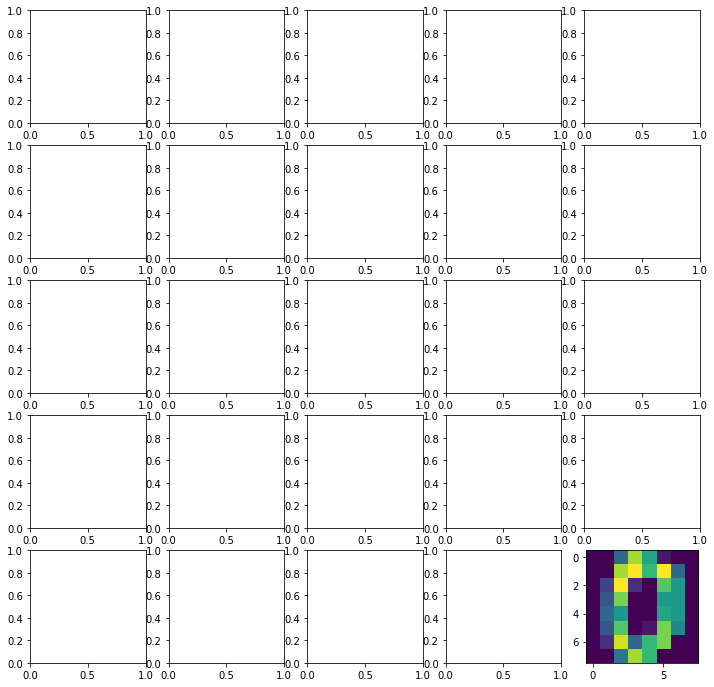

In [22]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
## FIX ME PLEASE
plt.imshow(digits_dict['images'][0])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [38]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2) 
model=LogisticRegression()
len(X_train)


1437

In [16]:
len(X_test)

360

In [17]:
len(y_train)

1437

In [18]:
len(y_test)

360

In [19]:
from sklearn.linear_model import LogisticRegression
rlog = LogisticRegression()
rlog.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
import sklearn as sk
sk.model_selection.GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [37]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [22]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(rlog.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)

Valores:

originales:  [4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5, 2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2, 8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 2, 7, 2, 1, 0, 8, 2, 8, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8

In [23]:
#k-means
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets.samples_generator import make_blobs

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [39]:
def init_blobs(N, k, seed=1):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X
digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target,cluster
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666,-1.149648,0.515472,1.905963,-0.114222,-0.03338,0.486489,0.469885,-1.499901,-1.614063,0.076398,1.541814,-0.047232,0.0,0.764656,0.052630,-1.447630,-1.736664,0.043616,1.439558,0.0,-0.061344,0.810554,0.630117,-1.122457,-1.066232,0.660965,0.818451,-0.088742,-0.035433,0.742119,1.150652,-0.868671,0.110130,0.537611,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,-1.567746,3
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308,1.441860,-0.291553,-0.548805,-0.114222,-0.03338,1.440185,0.954513,1.220586,0.987402,-0.945588,-0.628896,-0.047232,0.0,-0.672372,-1.054452,1.105570,0.960644,-0.978702,-0.822695,0.0,-0.061344,-0.531284,-0.899839,1.362175,1.330789,-0.392787,-0.798272,-0.088742,-0.035433,-0.403575,-1.153118,1.236394,1.242083,-0.457500,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,-1.218646,2
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543,0.146106,1.322497,-0.548805,-0.114222,-0.03338,-0.785105,-1.307084,-0.479719,0.824811,0.587391,-0.628896,-0.047232,0.0,-0.384967,0.052630,0.626845,0.792062,-1.319475,-0.822695,0.0,-0.061344,2.487851,1.395095,1.362175,-0.427026,-1.446538,-0.798272,-0.088742,-0.035433,1.314966,0.973439,1.236394,1.242083,0.371759,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,-0.869545,2
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543,0.955952,-1.259982,-0.548805,-0.114222,-0.03338,-0.785105,-1.145542,1.050555,0.174444,-1.115919,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-1.288055,0.286317,0.554775,-0.539913,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.066232,0.309714,1.049411,-0.088742,-0.035433,-0.403575,0.087374,-1.060040,-0.833165,0.869315,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,-0.520445,1
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543,-0.177833,-0.937173,0.064887,-0.114222,-0.03338,-0.785105,-0.337828,1.050555,-1.614063,0.246729,1.541814,-0.047232,0.0,0.764656,1.317867,0.148120,-1.736664,1.236320,0.873995,0.0,-0.061344,0.810554,1.242100,1.362175,0.851385,1.363466,-0.567312,-0.088742,-0.035433,-0.403575,-1.330331,-1.251410,1.053424,0.205907,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,-0.171345,0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = [i for i in digits.columns]
digits[columns] = scaler.fit_transform(digits[columns])

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666,-1.149648,0.515472,1.905963,-0.114222,-0.03338,0.486489,0.469885,-1.499901,-1.614063,0.076398,1.541814,-0.047232,0.0,0.764656,0.052630,-1.447630,-1.736664,0.043616,1.439558,0.0,-0.061344,0.810554,0.630117,-1.122457,-1.066232,0.660965,0.818451,-0.088742,-0.035433,0.742119,1.150652,-0.868671,0.110130,0.537611,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,-1.567746
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308,1.441860,-0.291553,-0.548805,-0.114222,-0.03338,1.440185,0.954513,1.220586,0.987402,-0.945588,-0.628896,-0.047232,0.0,-0.672372,-1.054452,1.105570,0.960644,-0.978702,-0.822695,0.0,-0.061344,-0.531284,-0.899839,1.362175,1.330789,-0.392787,-0.798272,-0.088742,-0.035433,-0.403575,-1.153118,1.236394,1.242083,-0.457500,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,-1.218646
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543,0.146106,1.322497,-0.548805,-0.114222,-0.03338,-0.785105,-1.307084,-0.479719,0.824811,0.587391,-0.628896,-0.047232,0.0,-0.384967,0.052630,0.626845,0.792062,-1.319475,-0.822695,0.0,-0.061344,2.487851,1.395095,1.362175,-0.427026,-1.446538,-0.798272,-0.088742,-0.035433,1.314966,0.973439,1.236394,1.242083,0.371759,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,-0.869545
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543,0.955952,-1.259982,-0.548805,-0.114222,-0.03338,-0.785105,-1.145542,1.050555,0.174444,-1.115919,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-1.288055,0.286317,0.554775,-0.539913,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.066232,0.309714,1.049411,-0.088742,-0.035433,-0.403575,0.087374,-1.060040,-0.833165,0.869315,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,-0.520445
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543,-0.177833,-0.937173,0.064887,-0.114222,-0.03338,-0.785105,-0.337828,1.050555,-1.614063,0.246729,1.541814,-0.047232,0.0,0.764656,1.317867,0.148120,-1.736664,1.236320,0.873995,0.0,-0.061344,0.810554,1.242100,1.362175,0.851385,1.363466,-0.567312,-0.088742,-0.035433,-0.403575,-1.330331,-1.251410,1.053424,0.205907,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,-0.171345


In [40]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,1.064566e-15,4.024481e-16,-3.064389e-17,-1.510571e-16,-3.142852e-16,3.889179e-16,-1.091318e-15,-5.812221e-16,-3.223948e-17,8.130515e-17,2.607202e-17,5.579535e-16,-2.523178e-16,6.373434e-16,7.016276e-16,-8.070355e-16,1.099102e-16,2.043132e-16,-2.545420e-16,1.343296e-16,1.037938e-16,-1.163973e-16,-1.199483e-15,4.829038e-17,2.805522e-16,-1.445699e-17,-8.698909e-17,-1.437050e-16,-8.961483e-17,-2.580635e-16,4.192837e-16,0.0,-1.864582e-16,-3.374534e-16,1.383917e-17,1.019403e-16,3.892268e-18,2.968009e-16,0.0,-2.524568e-17,-1.194864e-16,4.831355e-17,-2.344473e-16,2.613380e-17,-8.624771e-17,6.495762e-16,5.245757e-16,1.180886e-16,-6.197973e-16,6.227628e-17,-3.478791e-16,-4.098311e-16,5.436818e-18,-1.526016e-17,5.391409e-16,1.857940e-16,-9.524317e-16,9.214789e-17,-6.113447e-16,-9.403225e-17,-1.338199e-16,1.306690e-15,-1.147508e-15,5.894005e-17
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,-1.915573e+00,-3.012600e+00,-2.149886e+00,-1.351095e+00,-5.149915e-01,-1.304334e-01,-4.462507e-02,-7.276463e-01,-1.740702e+00,-1.205432e+00,-1.149648e+00,-1.259982e+00,-5.488055e-01,-1.142218e-01,-3.337973e-02,-7.851052e-01,-1.468627e+00,-1.499901e+00,-1.614063e+00,-1.286250e+00,-6.288959e-01,-4.723238e-02,0.0,-6.723723e-01,-1.212607e+00,-1.447630e+00,-1.736664e+00,-1.489861e+00,-8.226945e-01,0.0,-6.134367e-02,-5.312841e-01,-1.052835e+00,-1.122457e+00,-1.226033e+00,-1.446538e+00,-7.982722e-01,-8.874162e-02,-3.543326e-02,-4.035750e-01,-1.330331e+00,-1.825518e+00,-1.776459e+00,-1.452612e+00,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01,-1.567746e+00
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,-8.085511e-01,-7.492665e-01,-6.858638e-01,-1.020586e+00,-5.149915e-01,-1.304334e-01,-4.462507e-02,-7.276463e-01,-8.618411e-01,-1.033049e+00,-9.876792e-01,-1.259982e+00,-5.488055e-01,-1.142218e-01,-3.337973e-02

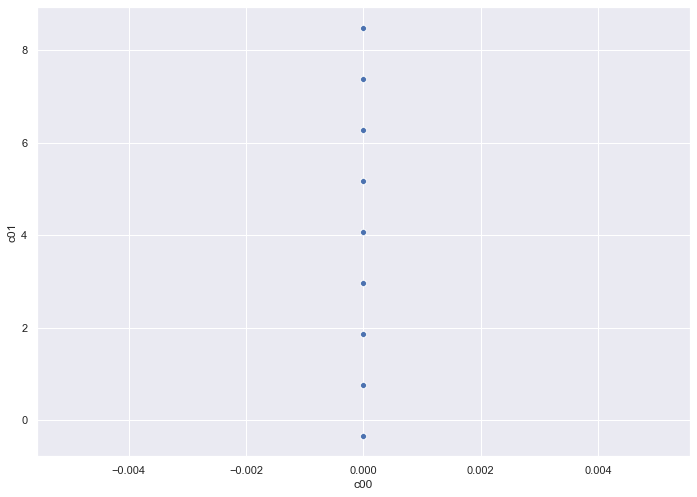

In [41]:
# graficar
#un ejemplo
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=digits,x="c00", y="c01")

In [33]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters
print(digits.columns)
len(clusters)
len(centroids)

Index(['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63', 'target'],
      dtype='object')


4

In [34]:
# etiquetar los datos con los clusters encontrados
clusters=[clusters[i] for i in range(0,1797)]
clusters=np.array(clusters)
digits["cluster"] = clusters
digits["cluster"] = digits["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=['c00','c01'])
centroids_df["cluster"] = [0,1,2,3]

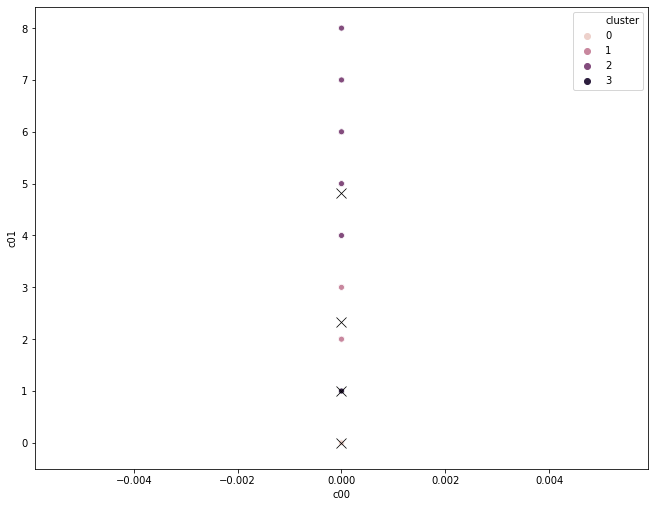

In [35]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))

sns.scatterplot( data=digits,
                     x="c00",
                     y="c01",
                     hue="cluster",
                     legend='full')

sns.scatterplot(x="c00", y="c01",
                     s=100, color="black", marker="x",
                     data=centroids_df)

In [25]:
#regresion logistica
# librerias
 
import os
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [26]:
# datos 
from sklearn.linear_model import LogisticRegression

X = digits[['c00', 'c01']]
Y = digits['c02']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 1) 

In [27]:
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1617
numero de filas test set      :  180


In [28]:
# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

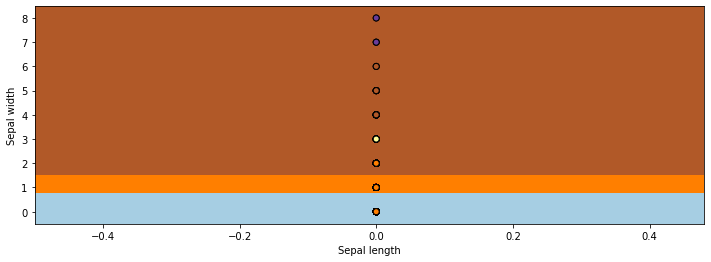

In [29]:
# grafica de la regresion logistica 
plt.figure(figsize=(12,4))

# dataframe a matriz
X = X.values
Y = Y.values

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rlog.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# separ los datos en train y eval
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5)
precision = cross_val_score(estimator=model,
                            X=X_train,
                            y=y_train,
                            cv=10)
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),np.std(precision)))

Precisiones: [0.8, 0.75, 0.83, 0.76, 0.81, 0.66, 0.67, 0.73, 0.74, 0.78] 
Precision promedio:  0.753 +/-  0.053


In [40]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, "gamma", param_range, 
    param_name='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


TypeError: validation_curve() got multiple values for argument 'param_name'

In [29]:
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [44]:
digits.columns = [f'V{k}' for k in range(1,digits.shape[1]+1)]
digits['y']=y
digits.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,y
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4,0,4


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_training = digits.drop(['y'], axis=1)
y_training = digits['y']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39 64] are constant.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [46]:
catrib = digits['y'].get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

AttributeError: 'Series' object has no attribute 'get_support'

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [48]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [49]:
mostar_resultados(digits,model,nx=5, ny=5,label = "correctos")

KeyError: "['target'] not found in axis"

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.